<a href="https://colab.research.google.com/github/AkshatShrinate/Zeotap/blob/main/Akshat_Shrinate_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the needed Libraries for Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Uploaded the files in a public github reporsitory and then imported the file into Google Colab
customer_dataset = pd.read_csv('https://raw.githubusercontent.com/AkshatShrinate/Zeotap/main/Datasets/Customers.csv')
Products_dataset = pd.read_csv('https://raw.githubusercontent.com/AkshatShrinate/Zeotap/main/Datasets/Products.csv')
Transactions_dataset = pd.read_csv('https://raw.githubusercontent.com/AkshatShrinate/Zeotap/main/Datasets/Transactions.csv')


In [ ]:
customer_dataset.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
customer_dataset.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [ ]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [ ]:
customer_dataset.isnull().sum() #to detect count of missing value for each column

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [ ]:
customer_dataset.shape

(200, 4)

In [ ]:
customer_dataset.nunique()

,0
CustomerID,200
CustomerName,200
Region,4
SignupDate,179


In [ ]:
Products_dataset.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
Products_dataset.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [ ]:
Products_dataset.shape

(100, 4)

In [ ]:
Products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [ ]:
Products_dataset.isnull().sum() #to detect count of missing value for each column

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [ ]:
Transactions_dataset.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
Transactions_dataset.describe()
Transactions_dataset.shape

(1000, 7)

In [ ]:
Transactions_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [ ]:
Transactions_dataset.nunique()

,0
TransactionID,1000
CustomerID,199
ProductID,100
TransactionDate,1000
Quantity,4
TotalValue,369
Price,100


In [ ]:
Transactions_dataset.isnull().sum() #to detect count of missing value for each column

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


**The Datasets are Consumers, Products and Transactions. Consumers are uniquely identifiable by the Consumer ID, while the products are identifiable using Product ID. Thus, using these IDs, we can merge the datasets to achieve a combined dataset with values corresponding for each Customer and each Transaction**

In [ ]:
transactions_customers = Transactions_dataset.merge(customer_dataset, on='CustomerID', how='inner')
merged_data = transactions_customers.merge(Products_dataset, on='ProductID', how='inner')

In [ ]:
merged_data.head() #the combined dataset is achieved for each Transaction ID

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
print(merged_data.columns) #the columns are printed. It is noted that the Price column is repeated twice due to its occurences in both Transaction and Products datasets respectively

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


In [ ]:
# Actually I wanted to reorder the columns to understand the data better
new_order = ['TransactionDate', 'CustomerID', 'CustomerName', 'Region',
             'ProductID', 'ProductName', 'Category', 'Price_x', 'Quantity', 'TotalValue','TransactionID']
new_dataset = merged_data[new_order] #to get a new order of the columns
# just to see the new order
new_dataset.head()

,TransactionDate,CustomerID,CustomerName,Region,ProductID,ProductName,Category,Price_x,Quantity,TotalValue,TransactionID
0,2024-08-25 12:38:23,C0199,Andrea Jenkins,Europe,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,1,300.68,T00001
1,2024-05-27 22:23:54,C0146,Brittany Harvey,Asia,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,1,300.68,T00112
2,2024-04-25 7:38:55,C0127,Kathryn Stevens,Europe,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,1,300.68,T00166
3,2024-03-26 22:55:37,C0087,Travis Campbell,South America,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,2,601.36,T00272
4,2024-03-21 15:10:10,C0070,Timothy Perez,Europe,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,3,902.04,T00363


In [ ]:
new_dataset.rename(columns={'Price_x': 'Product_Price'}, inplace=True) #the renaming of the Column is done to Product_Price

<ipython-input-7-2f66c8747354>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset.rename(columns={'Price_x': 'Product_Price'}, inplace=True) #the renaming of the Column is done to Product_Price


In [ ]:
new_dataset.head() #A new combined dataset has been achieved

,TransactionDate,CustomerID,CustomerName,Region,ProductID,ProductName,Category,Product_Price,Quantity,TotalValue,TransactionID
0,2024-08-25 12:38:23,C0199,Andrea Jenkins,Europe,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,1,300.68,T00001
1,2024-05-27 22:23:54,C0146,Brittany Harvey,Asia,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,1,300.68,T00112
2,2024-04-25 7:38:55,C0127,Kathryn Stevens,Europe,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,1,300.68,T00166
3,2024-03-26 22:55:37,C0087,Travis Campbell,South America,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,2,601.36,T00272
4,2024-03-21 15:10:10,C0070,Timothy Perez,Europe,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,3,902.04,T00363


In [ ]:
new_dataset.describe()

,Product_Price,Quantity,TotalValue
count,1000.00000,1000.000000,1000.000000
mean,272.55407,2.537000,689.995560
std,140.73639,1.117981,493.144478
min,16.08000,1.000000,16.080000
25%,147.95000,2.000000,295.295000
50%,299.93000,3.000000,588.880000
75%,404.40000,4.000000,1011.660000
max,497.76000,4.000000,1991.040000


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionDate  1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   CustomerName     1000 non-null   object 
 3   Region           1000 non-null   object 
 4   ProductID        1000 non-null   object 
 5   ProductName      1000 non-null   object 
 6   Category         1000 non-null   object 
 7   Product_Price    1000 non-null   float64
 8   Quantity         1000 non-null   int64  
 9   TotalValue       1000 non-null   float64
 10  TransactionID    1000 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [ ]:
new_dataset.nunique()

,0
TransactionDate,1000
CustomerID,199
CustomerName,199
Region,4
ProductID,100
ProductName,66
Category,4
Product_Price,100
Quantity,4
TotalValue,369


In [ ]:
new_dataset.isnull().sum() #to check the number of missing values in the dataset

,0
TransactionDate,0
CustomerID,0
CustomerName,0
Region,0
ProductID,0
ProductName,0
Category,0
Product_Price,0
Quantity,0
TotalValue,0


In [ ]:
new_dataset.shape

(1000, 11)

**Exploratory Data Analysis:**
The columns in The new_dataset are: TransactionDate, CustomerID, CustomerName, Region, ProductID, ProductName, Category, Product_Price,Quantity, TotalValue & TransactionID.

These columns are Analysed to generate graphs and charts to understand the data.

In [ ]:
'''1.) The Total Revenue from each region: To analyse the total amount of revenue that is generated from each part of the world'''
region_revenue = new_dataset.groupby('Region')['TotalValue'].sum().reset_index()
'''the new_dataset is grouped by the different regions.
Then the total value is added up for each region distinctively. Then the rest_index() function is used to convert the values back into a Dataframe format '''
region_revenue.head()

,Region,TotalValue
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56


<Axes: xlabel='Region', ylabel='TotalValue'>

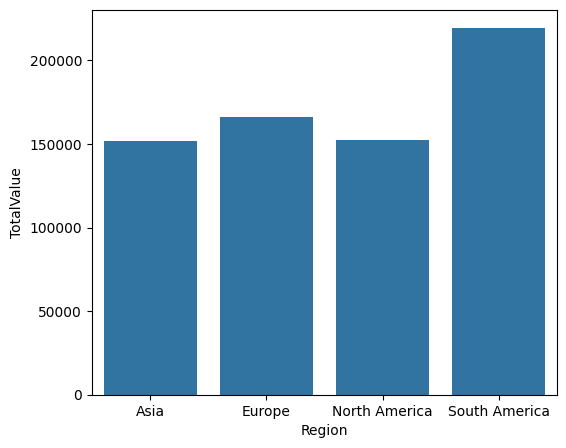

In [ ]:
#Now we plot this in a bar graph
plt.figure(figsize=(6, 5))
sns.barplot(data=region_revenue, x='Region', y='TotalValue')

In [ ]:
'''2.) The Total Revenue from each category: To analyse the total amount of revenue that is generated from each product category'''

Total_of_category_revenue = new_dataset.groupby('Category')['TotalValue'].sum().reset_index()

'''the new_dataset is grouped by the different category of product bought.
Then the total value is added up for each category distinctively to calculate total revenue generated by each category.
 Then the rest_index() function is used to convert the values back into a Dataframe format '''

Total_of_category_revenue.head()

,Category,TotalValue
0,Books,192147.47
1,Clothing,166170.66
2,Electronics,180783.50
3,Home Decor,150893.93


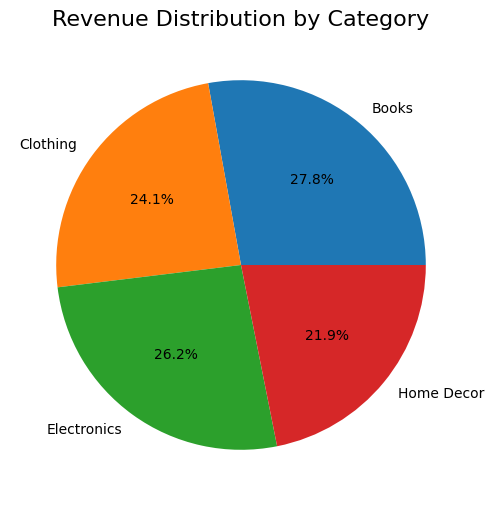

In [ ]:
#A pie chart is preferred to understand the Revenue Distribution among the various categories
plt.figure(figsize=(6, 6))
plt.pie(Total_of_category_revenue['TotalValue'],  # Numeric values for the pie chart
        labels=Total_of_category_revenue['Category'],  # Labels for the categories
        autopct='%1.1f%%')  #this is done to get the percentages of share on the pie chart
plt.title('Revenue Distribution by Category', fontsize=16)
#to display pie chart
plt.show()


In [ ]:
'''3.) Top 10 Products: To identify the top-selling products across categories and regions'''

product_sales = new_dataset.groupby(['ProductName', 'Category'])['Quantity'].sum().reset_index()
'''The products are aggregated or grouped by Product Name and then by the category they are in.The category is just to identify which category dominates the top 10'''
product_sales.head()

,ProductName,Category,Quantity
0,ActiveWear Biography,Books,18
1,ActiveWear Cookbook,Books,22
2,ActiveWear Cookware Set,Home Decor,51
3,ActiveWear Headphones,Electronics,36
4,ActiveWear Jacket,Clothing,76


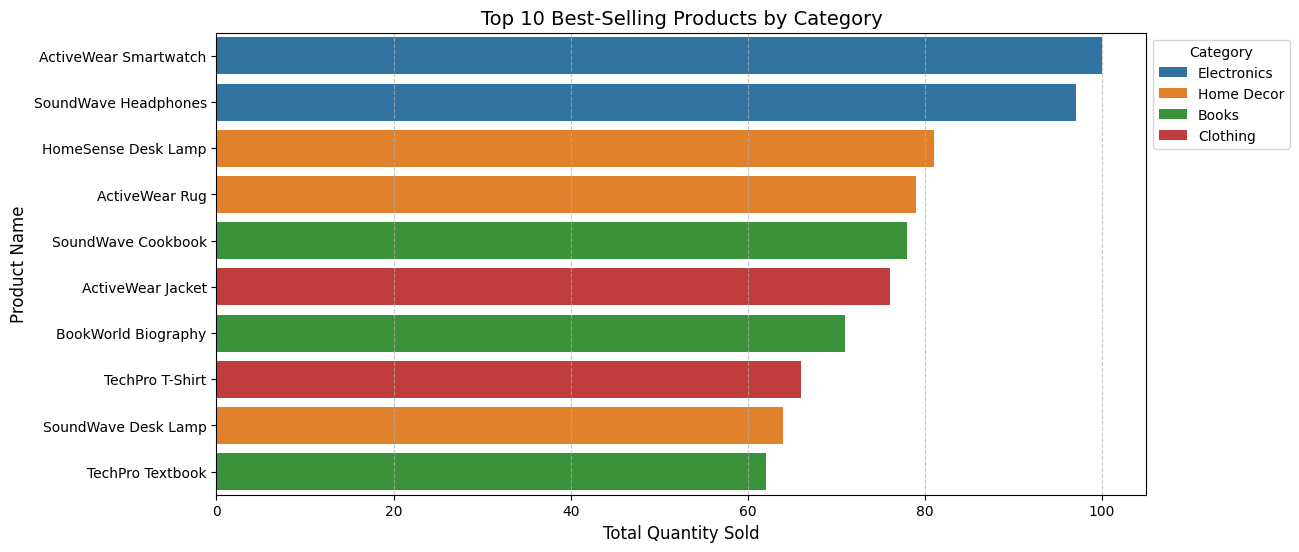

In [ ]:
#It is to be noted that product_sales is unordered. Thus we need to sort it in descending order to identify which are the top products
top_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)  # head(10) to get the top 10 products

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Quantity', y='ProductName', hue='Category')

# Add title and labels
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top 10 Best-Selling Products by Category", fontsize=14)
plt.legend(title="Category", bbox_to_anchor=(1, 1))  # Move legend outside for clarity and so that it does not obstruct the view of the graph
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [1]:
'''4.) The Total Revenue from all the categories for each region: To analyse the total amount of revenue that is generated from each product category in each region of the world'''

region_category_sales = new_dataset.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

'''The sales is grouped by region and then by category. Lets say 10 transactions are made in total so they are grouped according to the various regions
#Then these transactions are again grouped according to the product category. THen TotalValue is done to achieve the net revenue of each category in any region'''

region_category_sales = region_category_sales.merge(region_revenue, on='Region', suffixes=('', '_Total'))

'''Here, the region_revenue refers to revenue for each region. Dividing the TotalValue by TotalValue_Total will give us a percentage of contibution of each category in a region'''

region_category_sales.head()

NameError: name 'new_dataset' is not defined

In [ ]:
region_category_sales['Percentage'] = (region_category_sales['TotalValue'] / region_category_sales['TotalValue_Total']) * 100

# Pivot the data for easier plotting
pivot_sales = region_category_sales.pivot(index='Region', columns='Category', values='TotalValue')
pivot_sales.head()

Category,Books,Clothing,Electronics,Home Decor
Region,,,,
Asia,33119.03,49353.09,35658.15,33944.70
Europe,47464.42,36335.59,41562.60,40892.02
North America,41811.99,38038.49,44716.43,27746.49
South America,69752.03,42443.49,58846.32,48310.72


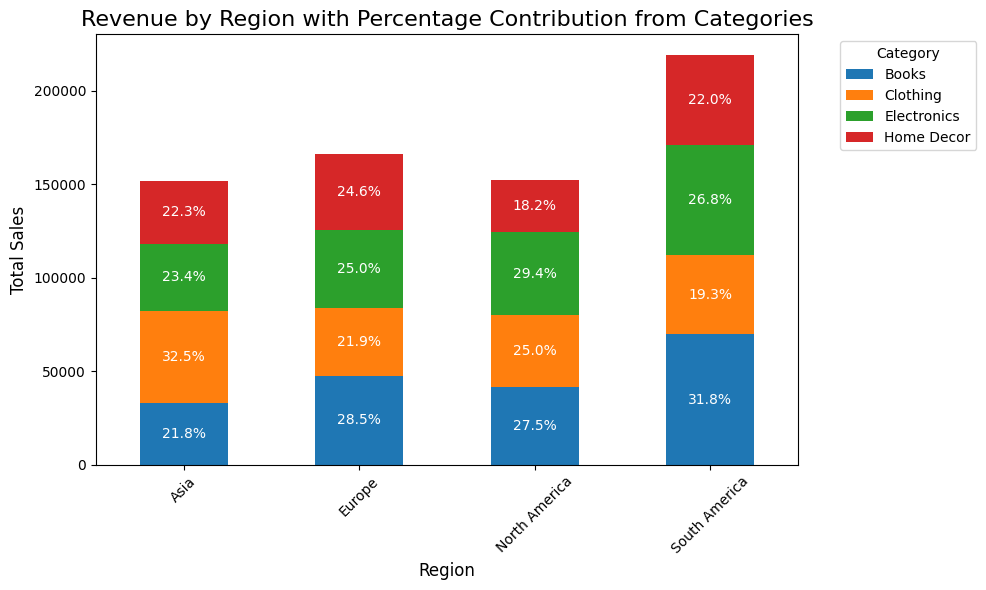

In [ ]:
# We make a stacked bar chart that shows percentage of sales contributed by each category to the total revenue for all regions
ax = pivot_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
# Add percentage labels on top of the bars
cumulative_height = np.zeros(len(pivot_sales))  # To track the cumulative height of stacked bars
# Iterate over each category's column in the pivoted data
for col in pivot_sales.columns:
    # Get the heights of the bars for the current category
    heights = pivot_sales[col].values
    # Add text labels to the bars
    for i, height in enumerate(heights):
        if height > 0:
            # Calculate the percentage contribution for this category within the region
            region_total = region_revenue.loc[region_revenue['Region'] == pivot_sales.index[i], 'TotalValue'].values[0]
            percentage = (height / region_total) * 100  # Percentage of revenue from the category
            # Calculate the y-position for the text label (stacked height + middle of current segment)
            ax.text(i, cumulative_height[i] + height / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10, color='white')
            # Update the cumulative height for the next category in the stack
            cumulative_height[i] += height
# Add title and labels
plt.title('Revenue by Region with Percentage Contribution from Categories', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-25-b7788fbc1df7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['TransactionDate'] = pd.to_datetime(new_dataset['TransactionDate'])


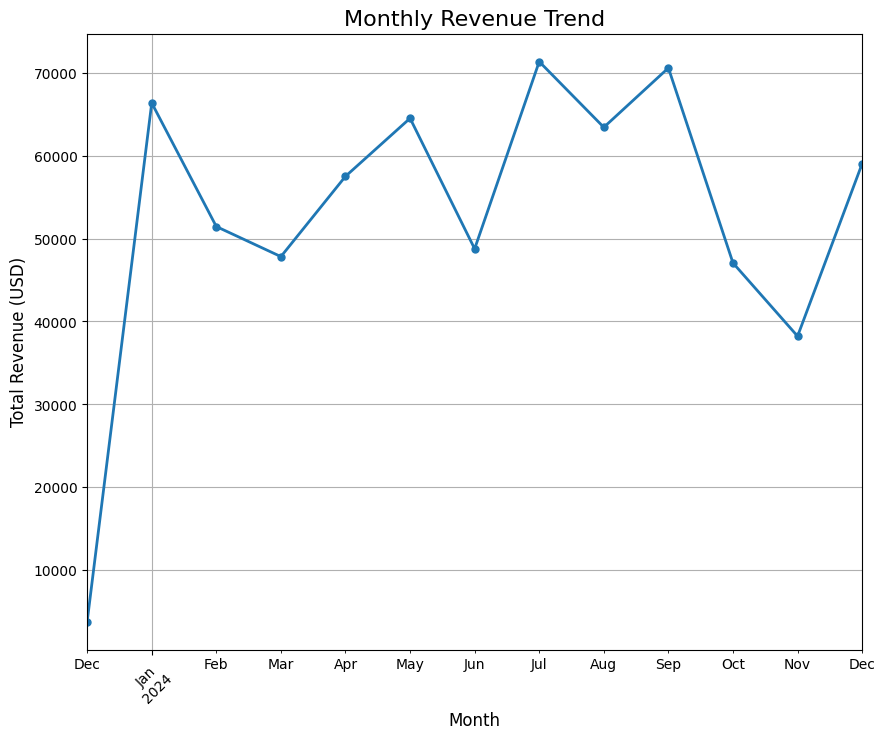

In [ ]:
# Convert 'TransactionDate' to DateTime format
new_dataset['TransactionDate'] = pd.to_datetime(new_dataset['TransactionDate'])
# Group by Month
monthly_revenue = new_dataset.groupby(pd.Grouper(key='TransactionDate', freq='ME'))['TotalValue'].sum()
# Create a larger figure using subplots
plt.figure(figsize=(10, 8))  # Set figure size here
# Plot the total revenue over months
monthly_revenue.plot(kind='line', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
# Show gridlines
plt.grid(True)
# Show plot
plt.show()

